# CIFAIR-10 Image Classification
## 1. Prerequisites
### 1.1 Packages

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import tensorflow as tf  
# Display the version
print(tf.__version__)

2.7.0


#### Other imports we need to efficiently carry out our task using neural networks are imported here

In [2]:
# other imports
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model

### 1.2 Utility Functions
#### The following function load_data extracts the dataset from file into a more readable structure in the format of a dictionary.

In [3]:
def load_data(file):
    import pickle
    with open(file, "rb") as f:
        dict = pickle.load(f, encoding="bytes")
    return dict

## 2. Data
#### For this project, we are using the CIFAR-10 dataset from https://www.cs.toronto.edu/~kriz/cifar.html; namely, the Python-compatible version at https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz. Unzip the compressed file and put the dataset files (data_batch_1 to 5 and test_batch) into a directory called data adjacent to this Jupyter notebook file.The dataset of CIFAR-10 is also available on tensorflow keras API, and we can download it on our local machine using tensorflow.keras.datasets.cifar10 and then distribute it to train and test set using load_data() function.

In [4]:
# Load in the data
cifar10 = tf.keras.datasets.cifar10

# Here we do the distribution of dataset samples into train and test set using load_data() function
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


### 1.3 pixel reduction
#### Another thing we want to do is to flatten the label values using the flatten() function. 

In [5]:
#Reduce pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0
 
# flatten the label values
y_train, y_test = y_train.flatten(), y_test.flatten()

#### By flattening, we are expected to have a blurred image since it's a 32 X 32. We can do the visualization using the subplot() function 

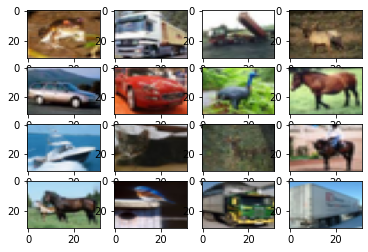

In [6]:
# visualize data by plotting images
fig, ax = plt.subplots(4, 4)
k = 0
 
for i in range(4):
    for j in range(4):
        ax[i][j].imshow(x_train[k], aspect='auto')
        k += 1
 
plt.show()

#### We are going to use a Convolution Neural Network or CNN to train our model. It includes using a convolution layer, a Conv 2D layer as well as pooling and normalization methods. 
#### Afterwards we’ll pass it into a dense layer and the final dense layer which is our output layer. We are using ‘relu‘ activation function. The output layer uses a “softmax” function.

In [8]:
# number of classes
K = len(set(y_train))
 
# calculate total number of classes
# for output layer
print("number of classes:", K)
 
# Build the model using the functional API
# input layer
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
 
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
 
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
 
x = Flatten()(x)
x = Dropout(0.3)(x)
 
# Hidden layer
x = Dense(1024, activation='relu')(x)
x = Dropout(0.3)(x)
 
# last hidden layer which is our output layer
x = Dense(K, activation='softmax')(x)
 
model = Model(i, x)

 # model description
model.summary()

number of classes: 10
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_6 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_7 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 

#### At this point, we will compile our model by using model.compile() function

#### we will use adam optimizer, sparse_categorical_crossentropy as the loss function and metrics=[‘accuracy’]

In [9]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#### now we want to fit our model using model.fit() by passing all our data to it. We are going to train our model till 40 epochs. We can tweak it if you want.

In [ ]:
r = model.fit(
  x_train, y_train, validation_data=(x_test, y_test), epochs=40)